## Implementing multiple linear regression using numpy

In [1]:
'''
Name : Ayush Bansal
Roll No: 15CS30006

Assignment 1a
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''
You will not import any other library other than these provided.

We provide the concrete_dataset as an example.
There are 8 dependent variables columns(1-8).
The last column (concrete compressive strength) is the value we wish to estimate.
'''

df= pd.read_csv('Concrete_Data.csv')
df.head()

# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape[0], X.shape[1] 
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset

def shuffle_dataset(X,Y):
    shuffle_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(shuffle_state)
    np.random.shuffle(Y)
    
    '''
        Write code to shuffle the dataset here. 
        
        Args: 
            X: Input feature ndarray
            Y: Input values ndarray
            
        Return:
            X and Y shuffled in place
    
    '''
    pass

shuffle_dataset (X,Y) #This line should be added to shuffle the dataset
training_size = int(0.8*rows)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]


1030 8


## Defining the Linear Regression class 

In [2]:
class LinearRegression(object):
    def __init__(self):
        #Initialize all parameters
        
        self.w = np.random.uniform(-1,1,cols) #? Sample an array corresponding to the number of input features (cols) from a uniform distribution between -1 and 1
        self.b = np.random.uniform(-1,1) #? Sample from a uniform distribution between -1 and 1
    
    def forward(self, x):
        '''
            Do a forward pass of the classifier:
            Args:
                x: Input X matrix
            Return:
                y: y = X.w + b  
        '''
        # Complete this function 
        
        #raise NotImplementedError
        return x.dot(self.w) + self.b
        
    
    def backward(self, x, ypred, y_train, lr):
        '''
            Computes all gradients and updates the parameters w and b
            Args:
                x : x
                ypred: y=wx+b
                y_train = ground truth values
                lr = learning rate
        '''
        # Complete this function
        
        #raise NotImplementedError
        #print(x.shape,ypred.shape,y_train.shape)
        grad_w = x*np.reshape((ypred - y_train),(-1,1))
        #print(grad_w.shape)
        grad_w = np.mean(grad_w,axis=0)
        #print(grad_w.shape)
        grad_b = np.mean(ypred - y_train)
        self.w -= lr*grad_w
        self.b -= lr*grad_b

def MSELoss(y, ypred):
    '''
        Args:
            y: ground truth labels
            ypred: predicted labels
        Return:
            Mean squared error loss
    '''
    
    # Compute the mean squared error 
    #raise NotImplementedError
    return np.mean(0.5*(np.square(ypred - y)))


Starting Training with Gradient Descent
Loss fuction decrease after 10000 epochs of training


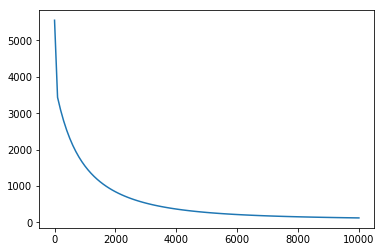

Final training loss
124.73122753001937
Starting to test
Final test loss: 121.07114606545504


In [3]:
# Specify the number of epochs as well as the learning rate. 
# Keep the values fixed.

print('Starting Training with Gradient Descent')
lreg = LinearRegression()
epochs = 10000
learning_rate = 0.0000001

loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    ypred = lreg.forward(X_train) # computes the predicted values
    loss = MSELoss(y_train, ypred) # computes the MSE loss between the actual and predicted values
    # store the values of loss per epoch
    if e==0 or (e+1)%100==0:
        loss_history.append(loss)
        epoch_history.append(e+1)
        
    
    lreg.backward(X_train, ypred, y_train, learning_rate)

print('Loss fuction decrease after ' + str(epochs) + ' epochs of training')
#Plot the decrease in loss with epoch
plt.plot(epoch_history, loss_history)
plt.show()

print('Final training loss')   
ypred = lreg.forward(X_train)
y_train_loss= MSELoss(y_train, ypred) # Print training loss ?
print(y_train_loss)
print('Starting to test')
ytest_pred= lreg.forward(X_test) # find predictions on test set ?
loss= MSELoss(y_test,ytest_pred) # compute loss on test set ?
print('Final test loss: ' + str(loss))
